In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
ps4 = pd.read_csv('PS4_GamesSales.csv',encoding = 'windows-1252')
xbox  = pd.read_csv('XboxOne_GameSales.csv',encoding = 'windows-1252')
sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv',encoding = 'windows-1252')

In [3]:
appended = ps4.append(xbox, ignore_index = True)
df1 = appended.groupby(['Publisher'])['Year'].apply(Counter).to_frame().fillna(0)
formated1 = df1.reset_index(level = [0,1]).groupby(['level_1'])['Year'].apply(np.array).to_frame()
formated1.head()

,Year
level_1,
2013.0,"[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014.0,"[0.0, 0.0, 4.0, 1.0, 4.0, 3.0, 0.0, 1.0, 0.0, ..."
2015.0,"[0.0, 4.0, 2.0, 0.0, 4.0, 1.0, 0.0, 0.0, 0.0, ..."
2016.0,"[1.0, 10.0, 2.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0,..."
2017.0,"[0.0, 0.0, 4.0, 0.0, 16.0, 7.0, 1.0, 1.0, 1.0,..."


<IPython.core.display.Javascript object>


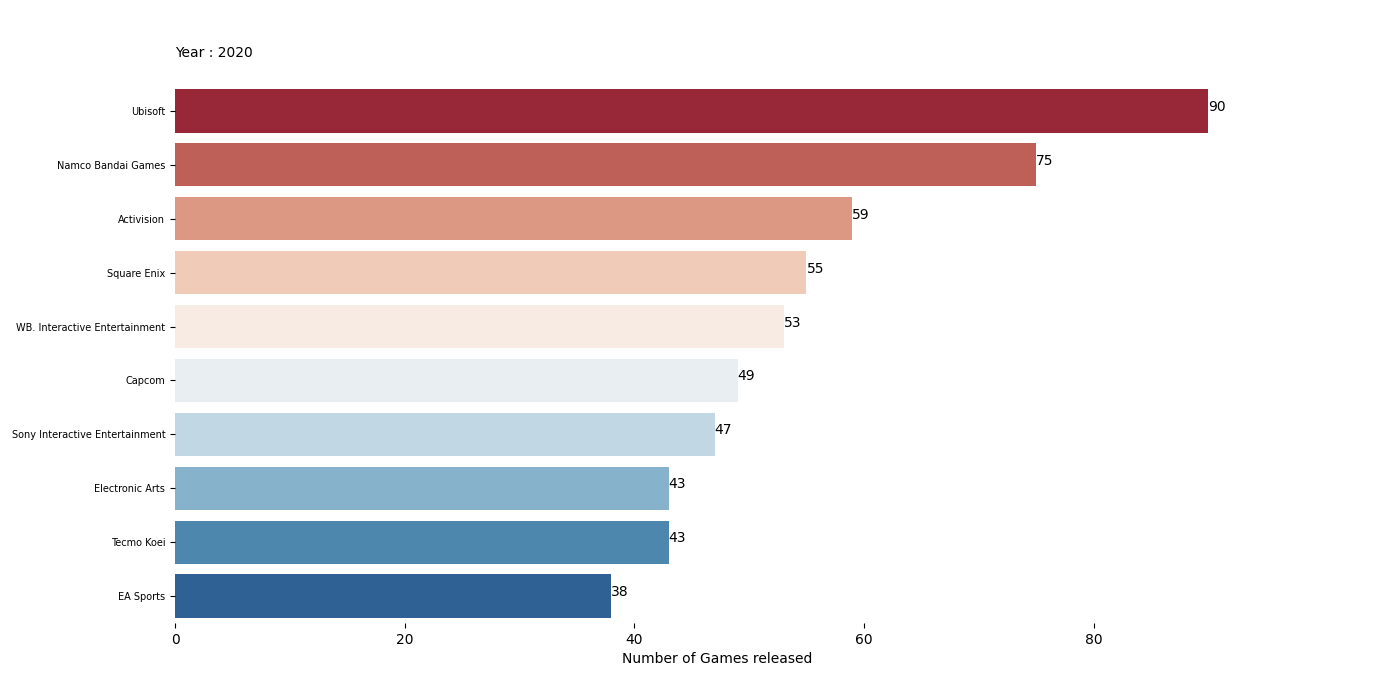

In [17]:
import matplotlib.animation as animation
fig = plt.figure(figsize = (14,7))
ax = plt.subplot(1,1,1)

top = 10
def animate(i, top = top):
    idxs = list(np.unique(formated1.index))
    if i == len(idxs) -1:
        a.event_source.stop()
    plt.cla()
    idx = idxs[i]
    yticks = np.unique(df1.reset_index(level=1).index.astype(str))
    yticks = [i.replace('Warner Bros', 'WB') for i in yticks]
    init =0
    for i in formated1['Year'].loc[:idx]:
        if idx == 2013:
            init = i
        else:
            init+=i
    dico = dict( zip(yticks , init) )
    dico = { k :v for k,v in sorted(dico.items(), key = lambda item : item[1], reverse = True) }
    pub = np.array(list(dico.keys())[:top])
    val = np.array(list(dico.values())[:top])

    bars = sns.barplot( val, pub, orient = 'h' , palette = 'RdBu')
    for count,i  in enumerate(val):
        bars.text( i  ,count,int(i))
    ax.set_xlabel('Number of Games released')
    ax.tick_params(axis = 'y', labelsize = 7)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.text(0,-1,f'Year : {int(idx)} ')

    
None
a = animation.FuncAnimation(fig, animate, interval=500, frames = 500)
# NB : We a game twice if it was released on both the PS4 and Xbox

In [5]:
df0 = sales.groupby(['Year_of_Release'])['Genre'].apply(Counter).to_frame().fillna(0)
formated = df0.reset_index(level = [0,1]).groupby(['level_1'])['Genre'].apply(list).to_frame()
formated.head()

,Genre
level_1,
Action,"[1.0, 25.0, 18.0, 7.0, 1.0, 2.0, 6.0, 2.0, 2.0..."
Adventure,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
Fighting,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, ..."
Misc,"[4.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
Platform,"[0.0, 3.0, 5.0, 5.0, 1.0, 4.0, 6.0, 2.0, 4.0, ..."


<IPython.core.display.Javascript object>


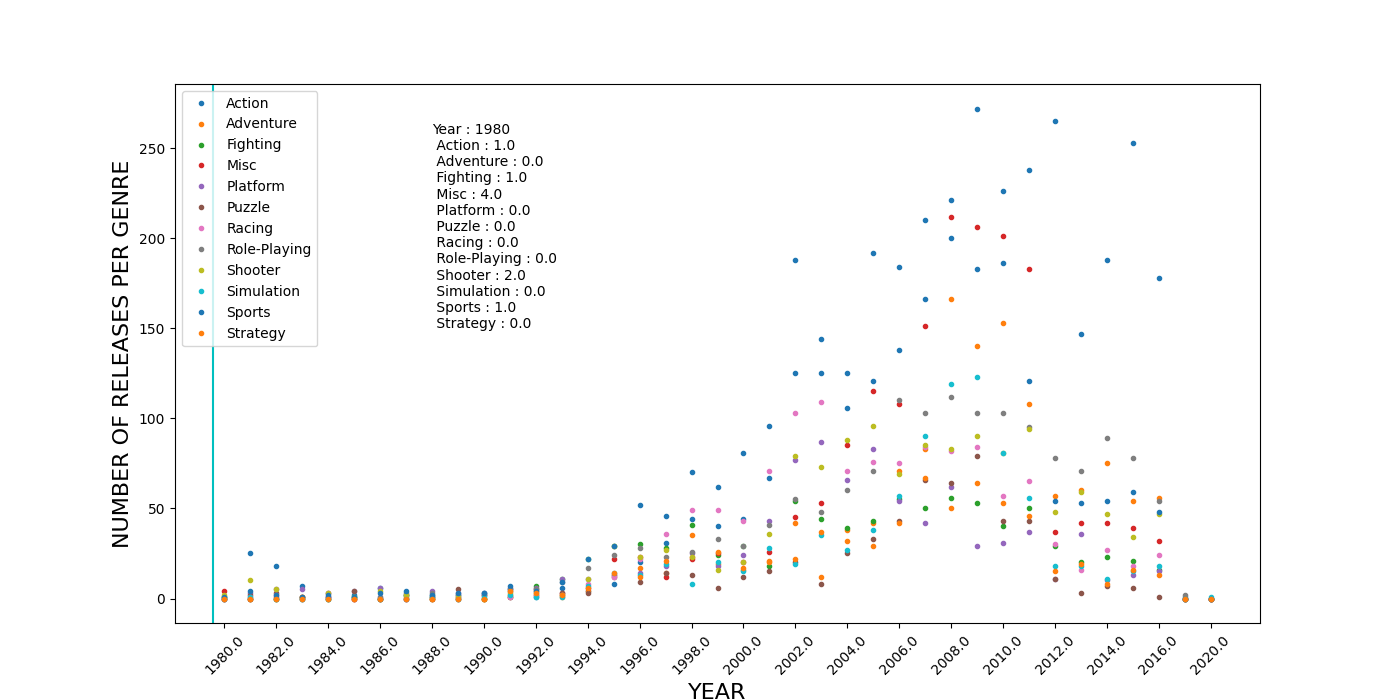

In [10]:
class Cursor:
    def __init__(self,ax):
        self.ax = ax
        self.ly = ax.axvline(color = 'c')
        self.text = ax.text(8,150,'')
    def mov(self,event):
        if not event.inaxes:
            return
        x = event.xdata
        self.ly.set_xdata(x)
        matrix_val = np.array(list(formated['Genre'])) 
        dico = dict( zip(list(formated.index), matrix_val[:,int(x)]) )
        values = ' \n '.join(  [ f'{k} : {v}' for k,v in dico.items()] ) 
        if int(x) > 37:
            self.text.set_text(f'Year : {1980 + int(x)+2} \n {values}')
        else:
            self.text.set_text(f'Year : {1980 + int(x)} \n {values}')
fig = plt.figure(figsize = (14,7))
ax = plt.subplot(1,1,1)
step = 2
xticks = np.unique(df0.reset_index(level=1).index.astype(str))
ax.xaxis.set_ticks( np.arange(0, len(xticks) , step)  ) 
ax.set_xticklabels( xticks[::step], rotation = 45)

for idx in formated.index:
    ax.plot(formated.loc[idx]['Genre'], 'o',markersize = 3)

cursor = Cursor(ax)
plt.connect('motion_notify_event',cursor.mov)
ax.legend(formated.index)
ax.set_xlabel('YEAR', size = 16)
ax.set_ylabel('NUMBER OF RELEASES PER GENRE', size = 16)
None